In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False



In [73]:

dt = .001  # Time step.
T = 1  # Total time.
n = int(T / dt)  # Number of time steps.
ntrials = 1 # Number of Realizations.
t = np.linspace(0., T, n)  # Vector of times.


In [74]:

sqrtdt = np.sqrt(dt)

def s(x):
    return np.where(x>=0,1,0)


In [75]:
x = np.zeros((ntrials,n))  # Vector containing all successive values of our process
w = np.zeros((ntrials,n))  # Vector containing all successive values of our process


for i in range(1,n-1):
  dw = sqrtdt * np.random.normal(0, 1, size=ntrials)  # Generate a vector of increments
  w[:,i + 1] = w[:,i]  +   dw  # Update the process using the stochastic integral
  x[:,i + 1] = x[:,i]  + s(w[:,i]) * dw  # Update the process using the stochastic integral







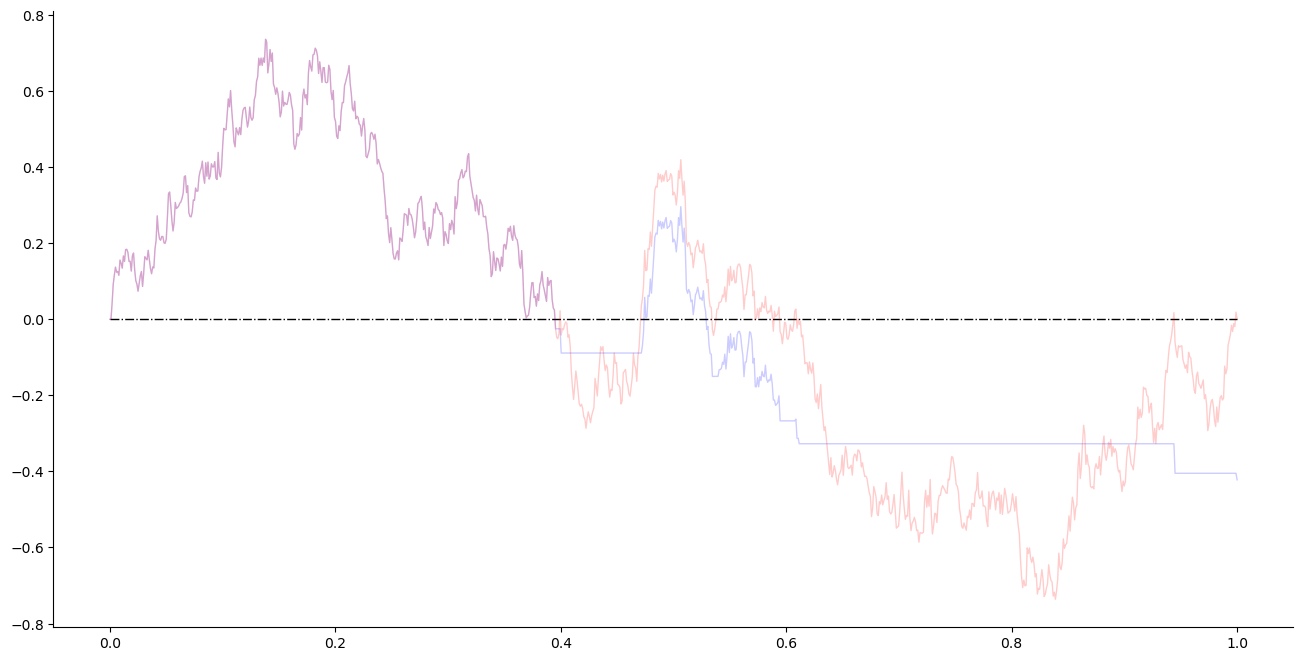

In [78]:

fig, ax = plt.subplots(figsize=(16, 8));
ax.plot(t, np.zeros(n), color='black', linewidth=1, linestyle='dashdot')  # Plot the first realization
for k in range(ntrials): # plotting fewer realizations shows the distribution better in this case
    ax.plot(t, x[k], color='blue', alpha=0.2,linewidth=1)  # Plot each realization
    ax.plot(t, w[k], color='red', alpha=0.2,linewidth=1)  
#    plt.plot(t, x[k], label='$x(t) = \int 1(x(t) \ge 0) dW_t$’)



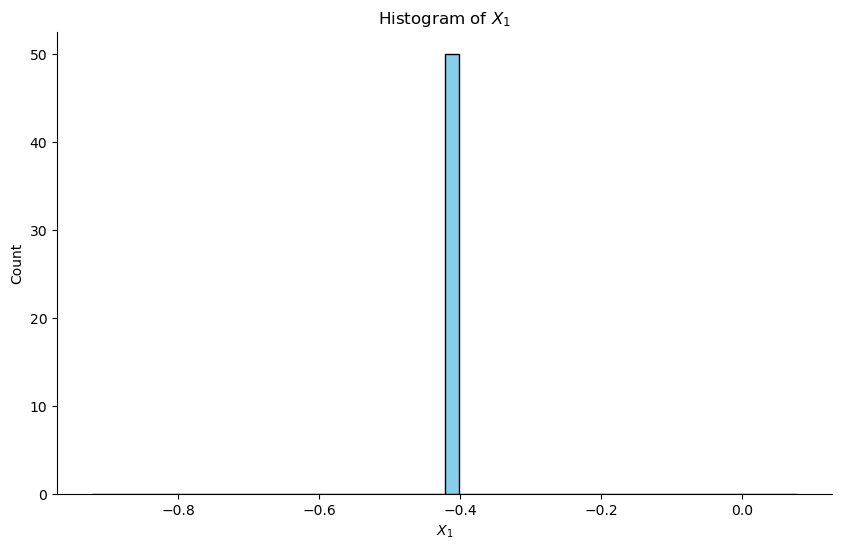

In [77]:
fig, ax = plt.subplots(figsize=(10, 6));
# Plotting a basic histogram
g = sns.histplot(x[:,-1], bins=50, kde=False, stat='density', color='skyblue', edgecolor='black', alpha=1, ax=ax);

# Adding labels and title
g.set_xlabel('$X_1$')
g.set_ylabel('Count')
g.set_title('Histogram of $X_1$');